In [1]:
import pandas as pa
import numpy as np

In [2]:
micro = pa.read_excel('Micro Final Data.xlsx', header = [0,1])
micro.head()

Unnamed: 0_level_0              R1                R2                 R3  \
  Unnamed: 0_level_1 L-filter: None  L-filter: 0.2 mm  L-filter: 0.25 mm    
0             SA_S01           58.97              1.40               0.85   
1             SA_S16          101.04              1.77               2.63   
2             SA_S05          108.43              0.40               2.00   
3             SA_S33          129.38              1.12               1.67   
4             SA_S04          142.87              0.48               1.48   

                R4               R5                         \
  L-filter: 0.5 mm L-filter: 0.8 mm Normal Stress Hardness   
0             2.01            11.84             5    0.057   
1             8.57            18.27             5    0.057   
2             4.93            20.08             5    0.057   
3             5.73            13.64             5    0.057   
4             3.36            23.86             5    0.057   

                        
  Friction Coefficient  
0                0.082  
1                0.238  
2                0.274  
3                0.086  
4                0.374

In [3]:
micro.columns = micro.columns.droplevel(0)
micro.head()

,Unnamed: 0_level_1,L-filter: None,L-filter: 0.2 mm,L-filter: 0.25 mm,L-filter: 0.5 mm,L-filter: 0.8 mm,Normal Stress,Hardness,Friction Coefficient
0,SA_S01,58.97,1.40,0.85,2.01,11.84,5,0.057,0.082
1,SA_S16,101.04,1.77,2.63,8.57,18.27,5,0.057,0.238
2,SA_S05,108.43,0.40,2.00,4.93,20.08,5,0.057,0.274
3,SA_S33,129.38,1.12,1.67,5.73,13.64,5,0.057,0.086
4,SA_S04,142.87,0.48,1.48,3.36,23.86,5,0.057,0.374


In [4]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0_level_1    296 non-null    object 
 1   L-filter: None        296 non-null    float64
 2   L-filter: 0.2 mm      296 non-null    float64
 3   L-filter: 0.25 mm     296 non-null    float64
 4   L-filter: 0.5 mm      296 non-null    float64
 5   L-filter: 0.8 mm      288 non-null    float64
 6   Normal Stress         296 non-null    int64  
 7   Hardness              296 non-null    float64
 8   Friction Coefficient  275 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 20.9+ KB


In [5]:
micro.describe()

,L-filter: None,L-filter: 0.2 mm,L-filter: 0.25 mm,L-filter: 0.5 mm,L-filter: 0.8 mm,Normal Stress,Hardness,Friction Coefficient
count,296.000000,296.000000,296.000000,296.000000,288.000000,296.000000,296.000000,275.000000
mean,265.287703,2.040676,3.082432,9.727703,22.474306,18.750000,0.555419,0.847342
std,116.676692,1.243903,1.680672,5.050105,8.582137,13.427457,0.891389,0.598380
min,57.860000,0.250000,0.850000,1.750000,10.530000,5.000000,0.046000,0.014000
25%,165.800000,1.290000,2.000000,6.930000,16.825000,8.750000,0.046000,0.380750
50%,274.345000,1.770000,2.700000,8.570000,20.065000,15.000000,0.057000,0.652000
75%,351.780000,2.600000,3.870000,12.660000,27.087500,25.000000,0.057000,1.196000
max,532.410000,6.390000,9.200000,28.910000,58.470000,40.000000,2.125000,3.198000


In [6]:
micro.nunique()

Unnamed: 0_level_1       60
L-filter: None           59
L-filter: 0.2 mm         55
L-filter: 0.25 mm        58
L-filter: 0.5 mm         57
L-filter: 0.8 mm         57
Normal Stress             4
Hardness                  3
Friction Coefficient    262
dtype: int64

In [7]:
micro.columns = micro.columns.map(lambda x: x.strip())
micro.columns

Index(['Unnamed: 0_level_1', 'L-filter: None', 'L-filter: 0.2 mm',
       'L-filter: 0.25 mm', 'L-filter: 0.5 mm', 'L-filter: 0.8 mm',
       'Normal Stress', 'Hardness', 'Friction Coefficient'],
      dtype='object')

In [8]:
micro['Friction Coefficient'].isnull().sum()


21

In [9]:
micro.dropna(subset = ['Friction Coefficient'], inplace = True)
micro['Friction Coefficient'].isnull().sum()


0

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# micro_40.head()

# Checking for Outliers

### Using IQR method

#### Visualising

In [12]:
def iqr(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_below = df[column_name] < lower_bound
    outliers_above = df[column_name] > upper_bound

    # Count outliers
    count_below = outliers_below.sum()
    count_above = outliers_above.sum()
    total_outliers = count_below + count_above

    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Number of outliers below lower bound: {count_below}")
    print(f"Number of outliers above upper bound: {count_above}")
    print(f"Total number of outliers: {total_outliers}")

    # Visualize original data
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column_name])
    plt.title(f'Box plot of {column_name}')

    plt.subplot(1, 2, 2)
    sns.histplot(df[column_name], bins=30)
    plt.title(f'Histogram of {column_name}')
    plt.show()



Lower bound: -0.8421249999999999
Upper bound: 2.418875
Number of outliers below lower bound: 0
Number of outliers above upper bound: 6
Total number of outliers: 6


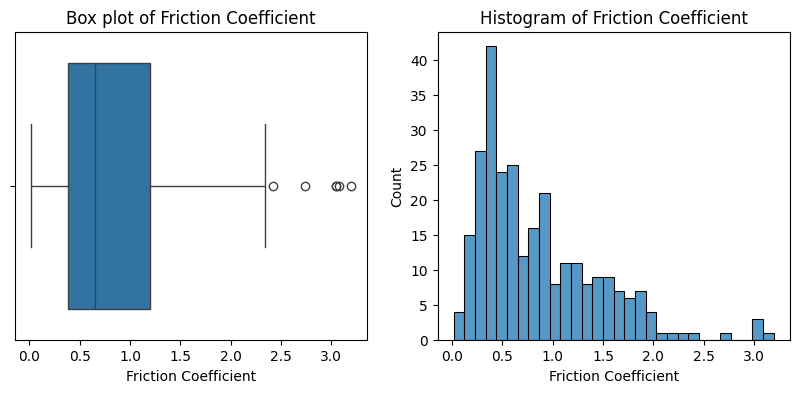

In [13]:
iqr(micro, 'Friction Coefficient')

#### Removing Outliers

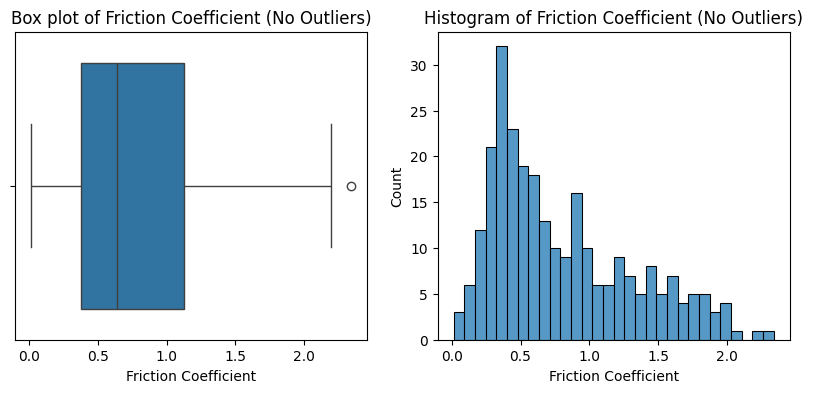

In [14]:
Q1 = micro['Friction Coefficient'].quantile(0.25)
Q3 = micro['Friction Coefficient'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Remove outliers
micro = micro[(micro['Friction Coefficient'] > lower_bound) & (micro['Friction Coefficient'] < upper_bound)]

# Visualize cleaned data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=micro['Friction Coefficient'])
plt.title(f'Box plot of Friction Coefficient (No Outliers)')

plt.subplot(1, 2, 2)
sns.histplot(micro['Friction Coefficient'], bins=30)
plt.title(f'Histogram of Friction Coefficient (No Outliers)')
plt.show()

In [15]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 0 to 295
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0_level_1    269 non-null    object 
 1   L-filter: None        269 non-null    float64
 2   L-filter: 0.2 mm      269 non-null    float64
 3   L-filter: 0.25 mm     269 non-null    float64
 4   L-filter: 0.5 mm      269 non-null    float64
 5   L-filter: 0.8 mm      261 non-null    float64
 6   Normal Stress         269 non-null    int64  
 7   Hardness              269 non-null    float64
 8   Friction Coefficient  269 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.0+ KB


In [16]:
micro.describe()

,L-filter: None,L-filter: 0.2 mm,L-filter: 0.25 mm,L-filter: 0.5 mm,L-filter: 0.8 mm,Normal Stress,Hardness,Friction Coefficient
count,269.000000,269.000000,269.000000,269.000000,261.000000,269.000000,269.000000,269.000000
mean,259.365428,2.034684,3.073420,9.694944,22.343908,17.620818,0.606387,0.801087
std,116.270793,1.267206,1.717098,5.140313,8.799966,12.990715,0.919803,0.515832
min,57.860000,0.250000,0.850000,1.750000,10.530000,5.000000,0.046000,0.014000
25%,165.800000,1.290000,2.000000,6.800000,16.600000,5.000000,0.046000,0.379000
50%,263.940000,1.770000,2.630000,8.570000,20.050000,10.000000,0.057000,0.638000
75%,346.900000,2.600000,3.870000,12.600000,27.060000,20.000000,2.125000,1.128500
max,532.410000,6.390000,9.200000,28.910000,58.470000,40.000000,2.125000,2.340000


# Checking Correllations

<Axes: xlabel='L-filter: None', ylabel='Friction Coefficient'>

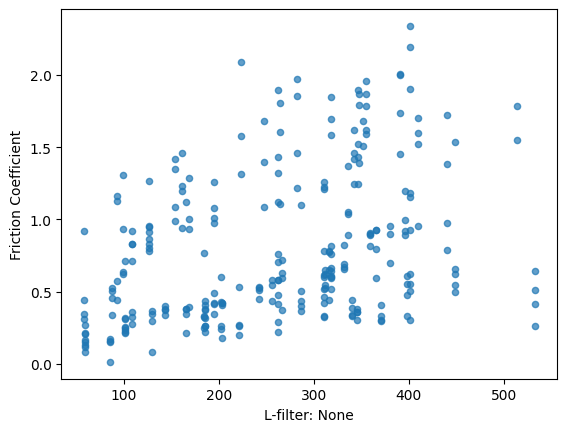

In [17]:
micro.plot(kind='scatter', x='L-filter: None', y= 'Friction Coefficient', alpha=0.7)


In [18]:
micro.drop('Unnamed: 0_level_1', axis = 1, inplace = True)
# micro_5.drop('Unnamed: 0_level_1', axis = 1, inplace = True)
# micro_10.drop('Unnamed: 0_level_1', axis = 1, inplace = True)
# micro_20.drop('Unnamed: 0_level_1', axis = 1, inplace = True)
# micro_40.drop('Unnamed: 0_level_1', axis = 1, inplace = True)

In [19]:
correlations = micro.corr(method = 'spearman')


In [20]:
correlations['Friction Coefficient'].sort_values(ascending=False)

Friction Coefficient    1.000000
L-filter: None          0.411211
L-filter: 0.25 mm       0.236290
L-filter: 0.5 mm        0.215561
L-filter: 0.2 mm        0.171417
L-filter: 0.8 mm        0.148489
Normal Stress           0.012893
Hardness               -0.736826
Name: Friction Coefficient, dtype: float64

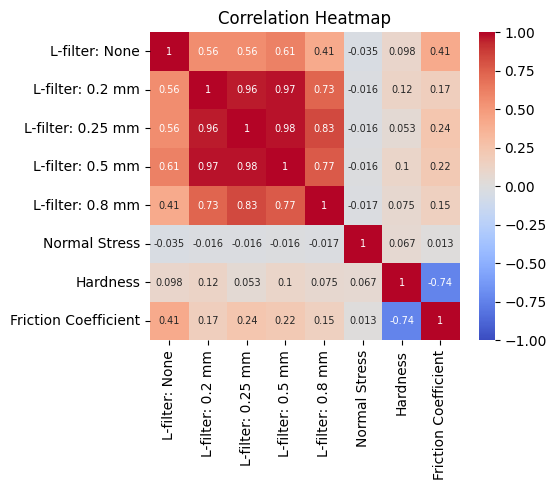

In [21]:
# Plot the heatmap with adjusted annotation size
plt.figure(figsize=(5, 4))  # Adjust the figure size as per your requirement
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 7})  # Adjust annot_kws to control annotation size
plt.title('Correlation Heatmap')
plt.show()

The highest Correllation Value of Roughness correspond to Roughness with no filter. So only that will be used as input parameter.

# Splitting Data

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

def stratified_split(micro, stratify_col, test_size=0.1, dev_size=0.15, random_state=50):
    # First split: 75% train, 25% dev_test
    stratified_splitter_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=random_state)
    for train_index, dev_test_index in stratified_splitter_1.split(micro, micro[stratify_col]):
        train_set = micro.iloc[train_index]
        dev_test_set = micro.iloc[dev_test_index]
    
    # Calculate the proportion of dev and test within the dev_test set
    total_dev_test_size = dev_size + test_size
    test_proportion = test_size / total_dev_test_size
    dev_proportion = dev_size / total_dev_test_size
    
    # Second split: split dev_test set into dev (15%) and test (10%)
    stratified_splitter_2 = StratifiedShuffleSplit(n_splits=1, test_size=test_proportion, random_state=random_state)
    for dev_index, test_index in stratified_splitter_2.split(dev_test_set, dev_test_set[stratify_col]):
        dev_set = dev_test_set.iloc[dev_index]
        test_set = dev_test_set.iloc[test_index]
    
    # Return the three sets
    return train_set, dev_set, test_set

# Example usage
# Assuming 'micro' is your DataFrame and 'Hardness' is the column to stratify by
train_set, dev_set, test_set = stratified_split(micro, 'Hardness')

# Print the sizes of the splits
print(f"Train set size: {len(train_set)}")
print(f"Dev set size: {len(dev_set)}")
print(f"Test set size: {len(test_set)}")


Train set size: 201
Dev set size: 40
Test set size: 28


In [23]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 267 to 216
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   L-filter: None        28 non-null     float64
 1   L-filter: 0.2 mm      28 non-null     float64
 2   L-filter: 0.25 mm     28 non-null     float64
 3   L-filter: 0.5 mm      28 non-null     float64
 4   L-filter: 0.8 mm      28 non-null     float64
 5   Normal Stress         28 non-null     int64  
 6   Hardness              28 non-null     float64
 7   Friction Coefficient  28 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 2.0 KB


# Pipeline

In [25]:
# Assuming 'train_set' is your DataFrame
micro_train_data = train_set[['L-filter: None', 'Normal Stress', 'Hardness']]
micro_train_labels = train_set['Friction Coefficient']
micro_train_data.head()


,L-filter: None,Normal Stress,Hardness
95,365.11,40,0.057
208,126.21,10,0.046
6,194.89,5,0.057
115,401.21,5,2.125
66,317.89,20,0.057


In [26]:
micro_dev_data = dev_set[['L-filter: None', 'Normal Stress', 'Hardness']]
micro_dev_labels = dev_set['Friction Coefficient']
micro_dev_data.head()


,L-filter: None,Normal Stress,Hardness
241,154.22,20,0.046
155,85.45,40,2.125
80,184.97,40,0.057
103,165.80,5,2.125
56,194.89,20,0.057


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [112]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['L-filter: None','Normal Stress','Hardness']),
    ])

the_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

In [30]:
micro_train_data_num = the_pipeline.fit_transform(micro_train_data)

In [31]:
micro_train_data_num.shape

(201, 3)

In [32]:
micro_dev_data_num = the_pipeline.transform(micro_dev_data)

In [33]:
micro_dev_data_num.shape

(40, 3)

# Models

### Defining some evaluation metrics before model implementations

In [34]:
from sklearn.metrics import mean_squared_error
def rmse(model):
    pred=model.predict(micro_train_data_num)
    lin_mse = mean_squared_error(micro_train_labels, pred)
    lin_rmse= np.sqrt(lin_mse)
    return lin_rmse

In [35]:
def R2_validation(true, pred):
    n = len(true)
    n1 = np.sum(true*pred)
    n2 = (np.sum(pred))*(np.sum(true))
    d1 = np.sum(pred**2)
    d2 = (np.sum(pred))**2
    d3 = np.sum(true**2)
    d4 = (np.sum(true))**2
    num = (n*n1 - n2)**2
    den = (n*d1 - d2)*(n*d3 - d4)

    return num/den

## 1. Random Forests

In [36]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor

In [39]:
# Base estimator (Random Forest for Bagging)
base_estimator = RandomForestRegressor(n_estimators=100, random_state=25)

# Bagging model
# n_estimatiors value decided using elbow method, givne below
model_rf = BaggingRegressor(estimator=base_estimator, n_estimators=18, random_state=27)

In [40]:
model_rf.fit(micro_train_data_num, micro_train_labels)

BaggingRegressor(estimator=RandomForestRegressor(random_state=25),
                 n_estimators=18, random_state=27)

In [41]:
rmse(model_rf)

0.1232834745542877

## Finding the best value of n_estimators for Random Forests

In [42]:
def evaluate_estimators(pipeline, train_data, train_labels, dev_data, dev_labels, n_estimators_range, R2_validation):
    # Lists to store RMSE and R² values
    rmse_values = []
    r2_values = []

    # Iterate over n_estimators values
    for n in n_estimators_range:
        # Base estimator (Random Forest for Bagging)
        base = RandomForestRegressor(n_estimators=100, random_state=25)        
        # Bagging model
        model = BaggingRegressor(estimator=base, n_estimators=n, random_state=27)

        # Fit the model on the training data
        model.fit(train_data, train_labels)

        dev_data_transformed = pipeline.transform(dev_data)

        # Predict on the dev set
        pred_rf_dev = model.predict(dev_data_transformed)

        # Compute RMSE
        lin_mse_dev = mean_squared_error(dev_labels, pred_rf_dev)
        lin_rmse_dev = np.sqrt(lin_mse_dev)
        rmse_values.append(lin_rmse_dev)

        # Compute R² value using R2_validation
        r2_value = R2_validation(dev_labels, pred_rf_dev)
        r2_values.append(r2_value)

        # Print the results for this n_estimators
        print(f"n_estimators: {n}, RMSE: {lin_rmse_dev:.4f}, R²: {r2_value:.4f}")

    # Plot RMSE vs. n_estimators
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(n_estimators_range, rmse_values, marker='o', linestyle='-', markersize=3.5)
    plt.xlabel('Number of Estimators')
    plt.ylabel('RMSE')
    plt.title('RMSE vs. Number of Estimators')

    # Plot R² vs. n_estimators
    plt.subplot(1, 2, 2)
    plt.plot(n_estimators_range, r2_values, marker='o', linestyle='-', markersize=3.5)
    plt.xlabel('Number of Estimators')
    plt.ylabel('R²')
    plt.title('R² vs. Number of Estimators')

    plt.tight_layout()
    plt.show()

n_estimators: 1, RMSE: 0.2054, R²: 0.8505
n_estimators: 2, RMSE: 0.2104, R²: 0.8427
n_estimators: 3, RMSE: 0.2143, R²: 0.8376
n_estimators: 4, RMSE: 0.2012, R²: 0.8568
n_estimators: 5, RMSE: 0.2056, R²: 0.8527
n_estimators: 6, RMSE: 0.2064, R²: 0.8509
n_estimators: 7, RMSE: 0.2103, R²: 0.8443
n_estimators: 8, RMSE: 0.2080, R²: 0.8500
n_estimators: 9, RMSE: 0.2076, R²: 0.8501
n_estimators: 10, RMSE: 0.2078, R²: 0.8497
n_estimators: 11, RMSE: 0.2090, R²: 0.8480
n_estimators: 12, RMSE: 0.2089, R²: 0.8481
n_estimators: 13, RMSE: 0.2092, R²: 0.8474
n_estimators: 14, RMSE: 0.2092, R²: 0.8483
n_estimators: 15, RMSE: 0.2050, R²: 0.8537
n_estimators: 16, RMSE: 0.2039, R²: 0.8545
n_estimators: 17, RMSE: 0.2024, R²: 0.8568
n_estimators: 18, RMSE: 0.2020, R²: 0.8575
n_estimators: 19, RMSE: 0.2026, R²: 0.8567
n_estimators: 20, RMSE: 0.2019, R²: 0.8579
n_estimators: 21, RMSE: 0.2020, R²: 0.8575
n_estimators: 22, RMSE: 0.2021, R²: 0.8575
n_estimators: 23, RMSE: 0.2014, R²: 0.8585
n_estimators: 24, RM

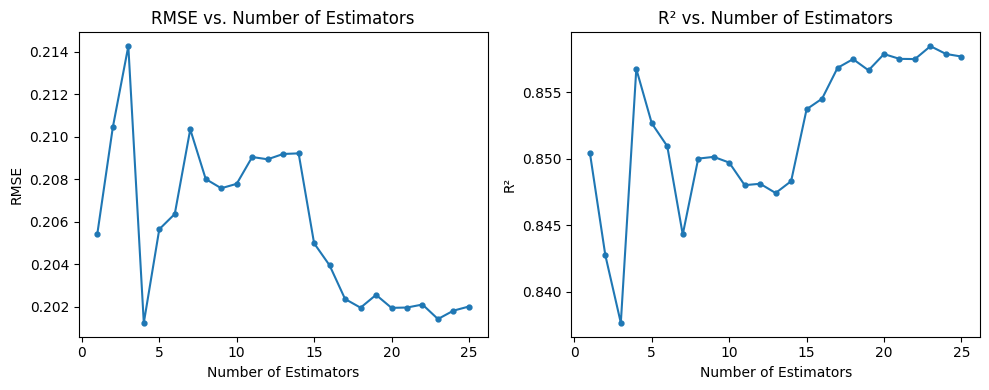

In [43]:
evaluate_estimators(the_pipeline,micro_train_data_num,micro_train_labels,micro_dev_data,micro_dev_labels,range(1,26),R2_validation)

#### Using the elbow method, we can conclude that best value of n_estimators will be 18

## 2. Decision Trees

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
model_dt = DecisionTreeRegressor(random_state=42)

In [46]:
model_dt.fit(micro_train_data_num, micro_train_labels)

DecisionTreeRegressor(random_state=42)

## 3. MLP

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [114]:
# Define the MLP model with regularization and dropout
model_mlp = Sequential()
model_mlp.add(Dense(32, input_dim=micro_train_data_num.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(1, activation='linear'))  # Linear activation for regression


In [115]:
# Compile the model
model_mlp.compile(loss='mean_squared_error',  # MSE loss function for regression
              optimizer='adam')


In [116]:
#Defining Early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=200, restore_best_weights=True)


In [117]:
# Train the model with early stopping
history = model_mlp.fit(micro_train_data_num, micro_train_labels, epochs=1000, batch_size=32, validation_data=(micro_dev_data_num, micro_dev_labels), callbacks=[early_stopping])


Epoch 1/1000
7/7 [==============================] - 1s 33ms/step - loss: 1.0244 - val_loss: 0.6836
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8124 - val_loss: 0.5473
Epoch 3/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6976 - val_loss: 0.4452
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.5718 - val_loss: 0.3679
Epoch 5/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.4635 - val_loss: 0.3130
Epoch 6/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.4159 - val_loss: 0.2801
Epoch 7/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.3599 - val_loss: 0.2590
Epoch 8/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.3655 - val_loss: 0.2433
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.3028 - val_loss: 0.2312
Epoch 10/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.2983 - val_loss: 0.2227
Epoch 11/1000
7/

In [118]:
pred_mlp=model_mlp.predict(micro_train_data_num)
lin_rmse= np.sqrt(mean_squared_error(micro_train_labels, pred_mlp))
lin_rmse

7/7 [==============================] - 0s 2ms/step


0.3526672861169662

## 4. GAM

In [53]:
!pip install pygam


### Finding best hyperparameters for the model

In [54]:
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

def grid_search_and_plot(micro_train_data_num, micro_train_labels, micro_dev_data_num, micro_dev_labels,
                         n_splines_values=[5, 10, 20,30,40,50,60,70,80,90,100], lam_values=[0.001, 0.01, 0.1, 1]):
    
    results = []

    def evaluate_model(model, X_val, y_val):
        preds = model.predict(X_val)
        mse = mean_squared_error(y_val, preds)
        rmse = np.sqrt(mse)
        r2 = R2_validation(y_val, preds)
        return rmse, r2

    for n_splines in n_splines_values:
        for lam in lam_values:
            gam = LinearGAM(s(0, n_splines=n_splines, lam=lam) + s(1, n_splines=n_splines, lam=lam) + s(2, n_splines=n_splines, lam=lam))
            gam.fit(micro_train_data_num, micro_train_labels)
            rmse, r2 = evaluate_model(gam, micro_dev_data_num, micro_dev_labels)
            results.append((n_splines, lam, rmse, r2))

    results_array = np.array(results, dtype=[('n_splines', int), ('lam', float), ('rmse', float), ('r2', float)])

    best_result_rmse = min(results_array, key=lambda x: x['rmse'])
    best_result_r2 = max(results_array, key=lambda x: x['r2'])
    print(f"Best hyperparameters for RMSE: n_splines={best_result_rmse['n_splines']}, lam={best_result_rmse['lam']}")
    print(f"Validation RMSE: {best_result_rmse['rmse']}")
    print(f"Best hyperparameters for R2: n_splines={best_result_r2['n_splines']}, lam={best_result_r2['lam']}")
    print(f"Validation R2: {best_result_r2['r2']}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for n_splines in n_splines_values:
        subset = results_array[results_array['n_splines'] == n_splines]
        axes[0].plot(subset['lam'], subset['rmse'], marker='o', label=f'n_splines={n_splines}', markersize=3.5)
        axes[1].plot(subset['lam'], subset['r2'], marker='o', label=f'n_splines={n_splines}', markersize=3.5)

    axes[0].set_xscale('log')
    axes[0].set_xlabel('Lambda (Regularization Parameter)')
    axes[0].set_ylabel('Validation RMSE')
    axes[0].set_title('Grid Search Results for RMSE')
    axes[0].legend()

    axes[1].set_xscale('log')
    axes[1].set_xlabel('Lambda (Regularization Parameter)')
    axes[1].set_ylabel('Validation R2')
    axes[1].set_title('Grid Search Results for R2 Validation')
    axes[1].legend()

    plt.tight_layout()
    plt.show()


Best hyperparameters for RMSE: n_splines=50, lam=0.001
Validation RMSE: 0.19011592620349876
Best hyperparameters for R2: n_splines=50, lam=0.001
Validation R2: 0.8719650947319241


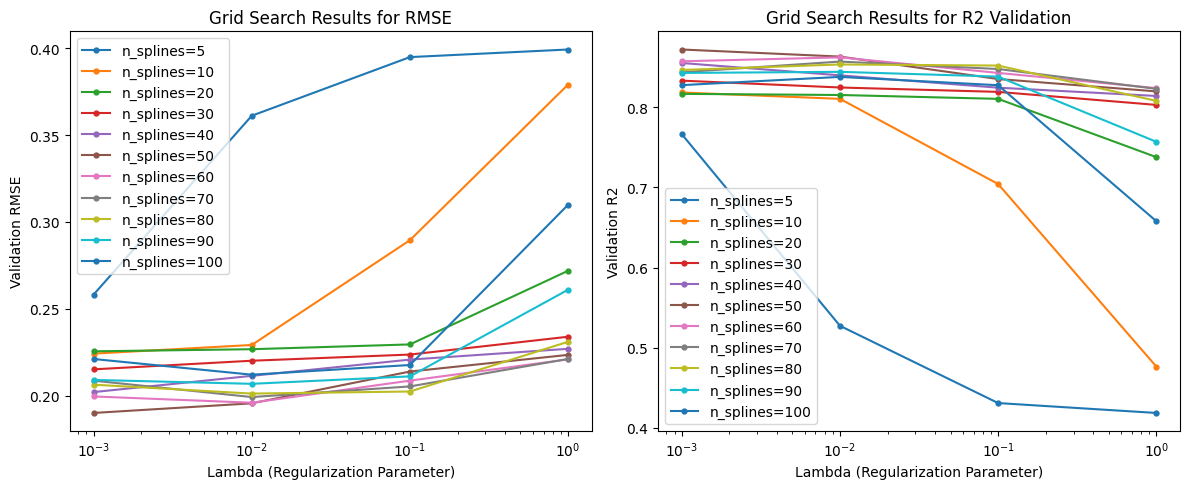

In [55]:
grid_search_and_plot(micro_train_data_num, micro_train_labels, micro_dev_data_num, micro_dev_labels)


#### Ideal Value for n_splines and labda will be 50 and 0.001 respetively

In [56]:
n_splines,lam=50,0.001
model_gam = LinearGAM(s(0, n_splines=n_splines, lam=lam) + s(1, n_splines=n_splines, lam=lam) + s(2, n_splines=n_splines, lam=lam))


In [57]:
model_gam.fit(micro_train_data_num, micro_train_labels)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + s(2) + intercept, 
   tol=0.0001, verbose=False)

In [58]:
pred_gam=model_gam.predict(micro_train_data_num)

In [59]:
lin_rmse_gam= np.sqrt(mean_squared_error(micro_train_labels, pred_gam))
lin_rmse_gam

0.1977656850795223

## Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score, KFold
def scores(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, micro_train_data_num, micro_train_labels, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cross_val_results)
    print('RMSE: ', rmse_scores.mean())
    print("Scores: ", cross_val_results)
    print("Mean: ", cross_val_results.mean())
    print("Standard deviation: ", cross_val_results.std())

#### Random Forests

In [61]:
scores(model_rf)

RMSE:  0.21103041531119912
Scores:  [-0.04059247 -0.04130373 -0.0465189  -0.04670657 -0.04780509]
Mean:  -0.044585349395625785
Standard deviation:  0.0030105481334613245


#### Decision Trees

In [62]:
scores(model_dt)

RMSE:  0.2809132075711097
Scores:  [-0.0871448  -0.07370199 -0.06405522 -0.07295043 -0.09903436]
Mean:  -0.07937736012385668
Standard deviation:  0.01228831979053779


# R2 Validation

#### Random Forests

In [63]:
pred_rf = model_rf.predict(micro_train_data_num)

In [64]:
R2_validation(micro_train_labels, pred_rf)

0.9426248289451654

#### Decision Trees

In [65]:
pred_dt = model_dt.predict(micro_train_data_num)

In [66]:
R2_validation(micro_train_labels, pred_dt)

0.9998994809528646

#### MLP

In [67]:
pred_mlp = model_mlp.predict(micro_train_data_num)

7/7 [==============================] - 0s 3ms/step


In [68]:
pred_mlp=pred_mlp.flatten()

In [69]:
R2_validation(micro_train_labels, pred_mlp)

0.5140277014336485

#### GAM

In [70]:
R2_validation(micro_train_labels, pred_gam)

0.8503015467270377

### Coefficient of Determination

In [71]:
from sklearn.metrics import r2_score

In [72]:
# Random Forests
r2_score(micro_train_labels, pred_rf)

0.9418243753586435

In [73]:
# Decision Trees
r2_score(micro_train_labels, pred_dt)

0.9998994809528662

In [74]:
# MLP
r2_score(micro_train_labels, pred_mlp)

0.5059419488694199

In [75]:
# GAM
r2_score(micro_train_labels, pred_gam)

0.8502960706667377

# Testing

In [76]:
micro_test_data = test_set[['L-filter: None', 'Normal Stress', 'Hardness']]
micro_test_labels = test_set['Friction Coefficient']
micro_test_data.head()

,L-filter: None,Normal Stress,Hardness
267,92.60,40,0.046
82,203.09,40,0.057
128,310.16,10,2.125
41,317.89,10,0.057
42,332.07,10,0.057


In [77]:
micro_test_data_num = the_pipeline.transform(micro_test_data)
micro_test_data_num.shape

(28, 3)

### Random Forests

In [78]:
pred_rf_test = model_rf.predict(micro_test_data_num)
lin_mse_test = mean_squared_error(micro_test_labels, pred_rf_test)
lin_rmse_test= np.sqrt(lin_mse_test)
lin_rmse_test

0.1846199457129449

In [79]:
R2_validation(micro_test_labels, pred_rf_test)

0.8919849964600258

In [80]:
r2_score(micro_test_labels, pred_rf_test)

0.8729116195808071

### Decision Trees

In [81]:
pred_dt_test = model_dt.predict(micro_test_data_num)
lin_mse_test_dt = mean_squared_error(micro_test_labels, pred_dt_test)
lin_rmse_test_dt= np.sqrt(lin_mse_test_dt)
lin_rmse_test_dt

0.2170958838114098

In [82]:
R2_validation(micro_test_labels, pred_dt_test)

0.8333655878316151

In [83]:
r2_score(micro_test_labels, pred_dt_test)

0.8242676220644596

### MLP

In [84]:
pred_mlp_test = model_mlp.predict(micro_test_data_num)
pred_mlp_test=pred_mlp_test.flatten()
lin_mse_test_mlp = mean_squared_error(micro_test_labels, pred_mlp_test)
lin_rmse_test_mlp= np.sqrt(lin_mse_test_mlp)
lin_rmse_test_mlp

1/1 [==============================] - 0s 48ms/step


0.43765973868683433

In [85]:
R2_validation(micro_test_labels, pred_mlp_test)

0.3131000704800596

In [86]:
r2_score(micro_test_labels, pred_mlp_test)

0.28579678511860995

### GAM

In [87]:
pred_gam_test = model_gam.predict(micro_test_data_num)
lin_mse_test_gam = mean_squared_error(micro_test_labels, pred_gam_test)
lin_rmse_test_gam= np.sqrt(lin_mse_test_gam)
lin_rmse_test_gam

0.22093831724782717

In [88]:
R2_validation(micro_test_labels, pred_gam_test)

0.8299433472635952

In [89]:
r2_score(micro_test_labels, pred_gam_test)

0.8179919104113567

## >>More Validation Factors

#### 1. MAPD (Mean Absolute Percentage Deviation)

#### For Train and Test Sets

In [90]:
def mapd(true,pred):
    mapd= (1/len(true))*np.sum((abs(true-pred)/true)*100)
    return mapd

##### For RF

In [91]:
mapd(micro_train_labels, pred_rf)

16.88876304169488

In [92]:
mapd(micro_test_labels, pred_rf_test)

15.208050856947397

##### For DT

In [93]:
mapd(micro_train_labels, pred_dt)

0.1182938639087584

In [94]:
mapd(micro_test_labels, pred_dt_test)

21.262381231775155

##### For MLP

In [95]:
mapd(micro_train_labels, pred_mlp)

50.456808864630055

In [96]:
mapd(micro_test_labels, pred_mlp_test)

39.22590889731373

##### For GAM

In [97]:
mapd(micro_train_labels, pred_gam)

27.43949136700085

In [98]:
mapd(micro_test_labels, pred_gam_test)

19.74044155647226

#### 2. Model Reliability Condition Metrics

In [99]:
import math
def validations(true,pred):
    mean_true=np.mean(true)
    mean_pred=np.mean(pred)
    R2=R2_validation(true, pred)
    k= (np.sum(true*pred))/(np.sum(pred**2))
    k_cr=(np.sum(true*pred))/(np.sum(true**2))
    Ro_2= 1- (np.sum(pred*(1-k)**2)/np.sum((pred-mean_pred)**2))
    Ro_cr_2=1- (np.sum(true*(1-k_cr)**2)/np.sum((true-mean_true)**2))
    Rs_2= R2*(1-math.sqrt(abs(R2-Ro_2)))

    print('k =', k)
    print('k` =', k_cr)
    print('')
    print('R2 =', R2)
    print('Ro_2 =', Ro_2)
    print('Ro`_2 =', Ro_cr_2)
    print('Rs_2 =', Rs_2)

In [100]:
validations(micro_test_labels, pred_rf_test)

k = 1.0753073714348815
k` = 0.9028077655359066

R2 = 0.8919849964600258
Ro_2 = 0.9763856818473997
Ro`_2 = 0.9697972929999146
Rs_2 = 0.6328473344699153


In [101]:
validations(micro_test_labels, pred_dt_test)

k = 1.0370427073318877
k` = 0.9201659182019939

R2 = 0.8333655878316151
Ro_2 = 0.9952725620231622
Ro`_2 = 0.979622100999752
Rs_2 = 0.49803872844473007


In [102]:
validations(micro_test_labels, pred_mlp_test)

k = 1.089619776719261
k` = 0.7476307385634061

R2 = 0.3131000704800596
Ro_2 = 0.9320026263594627
Ro`_2 = 0.7963634880174354
Rs_2 = 0.06678311754948903


In [103]:
validations(micro_test_labels, pred_gam_test)

k = 1.06079526558416
k` = 0.8997887758137567

R2 = 0.8299433472635952
Ro_2 = 0.9843859622905128
Ro`_2 = 0.9678918361072922
Rs_2 = 0.5037823538000719


# Graphs

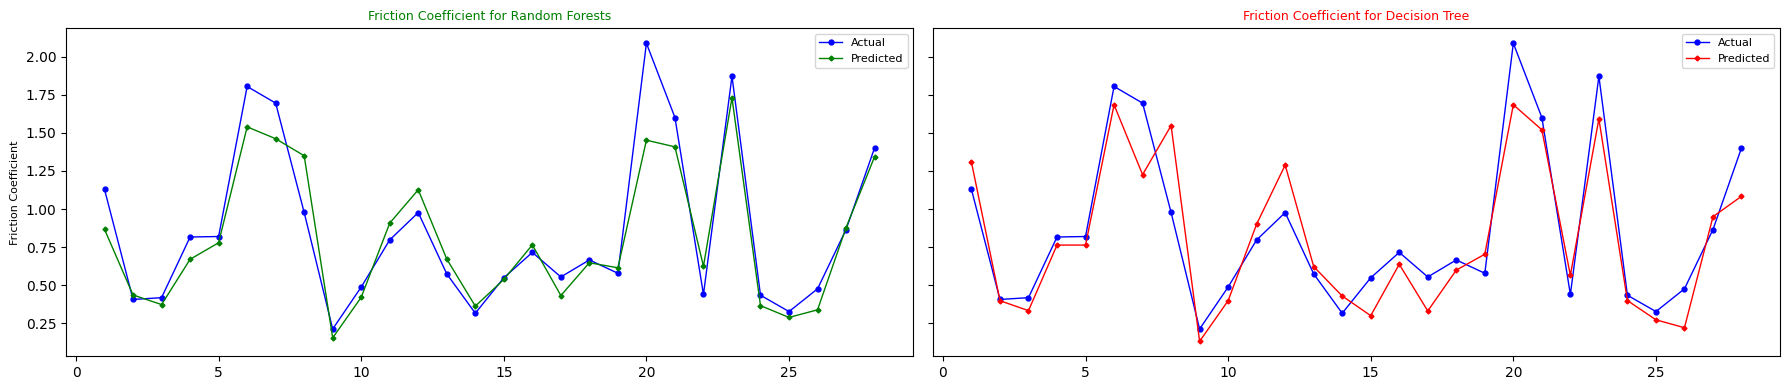

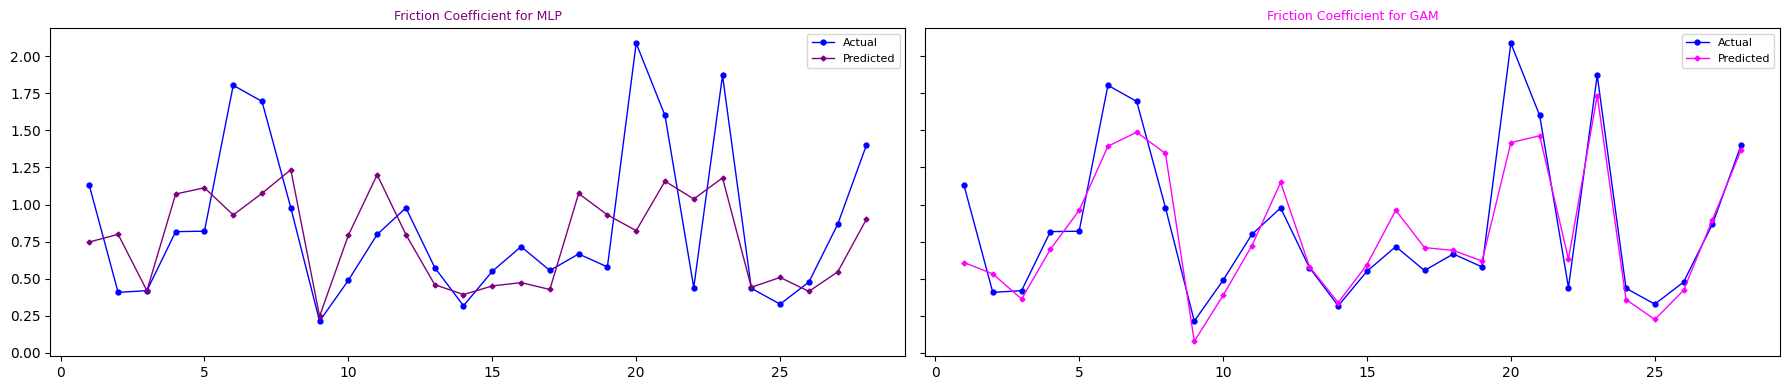

In [104]:
# Create serial numbers for x-axis
serial_numbers = range(1, len(pred_rf_test) + 1)

# Define the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 4), sharey=True)  # 1 row, 2 columns

# Plot for Random Forest
axs[0].plot(serial_numbers, np.array(micro_test_labels), label='Actual', color='blue', markersize=3.5, marker='o', linestyle='-', linewidth=1)
axs[0].plot(serial_numbers, pred_rf_test, label='Predicted', color='green', markersize=2.5, marker='D', linestyle='-', linewidth=1)
axs[0].set_title('Friction Coefficient for Random Forests', fontsize=9, color='green')
axs[0].set_ylabel('Friction Coefficient', fontsize=8)
axs[0].legend(fontsize=8)

# Plot for Decision Tree Regressor (DTR)
axs[1].plot(serial_numbers, np.array(micro_test_labels), label='Actual', color='blue', markersize=3.5, marker='o', linestyle='-', linewidth=1)
axs[1].plot(serial_numbers, pred_dt_test, label='Predicted', color='red', markersize=2.5, marker='D', linestyle='-', linewidth=1)
axs[1].set_title('Friction Coefficient for Decision Tree', fontsize=9, color='red')
axs[1].legend(fontsize=8)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Define the second figure and subplots
fig2, axs2 = plt.subplots(1, 2, figsize=(18, 4), sharey=True)  # 1 row, 2 columns

# Plot for MLP
axs2[0].plot(serial_numbers, np.array(micro_test_labels), label='Actual', color='blue', markersize=3.5, marker='o', linestyle='-', linewidth=1)
axs2[0].plot(serial_numbers, pred_mlp_test, label='Predicted', color='purple', markersize=2.5, marker='D', linestyle='-', linewidth=1)
axs2[0].set_title('Friction Coefficient for MLP', fontsize=9, color='purple')
axs2[0].legend(fontsize=8)

# Plot for GAM
axs2[1].plot(serial_numbers, np.array(micro_test_labels), label='Actual', color='blue', markersize=3.5, marker='o', linestyle='-', linewidth=1)
axs2[1].plot(serial_numbers, pred_gam_test, label='Predicted', color='magenta', markersize=2.5, marker='D', linestyle='-', linewidth=1)
axs2[1].set_title('Friction Coefficient for GAM', fontsize=9, color='magenta')
axs2[1].legend(fontsize=8)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [106]:
import joblib


In [107]:
joblib.dump(the_pipeline, 'Micro Pipeline.pkl')

['Micro Pipeline.pkl']

In [108]:
joblib.dump(model_rf, 'RF Model.pkl')


['RF Model.pkl']

In [109]:
joblib.dump(model_dt, 'DTR Model.pkl')


['DTR Model.pkl']

In [110]:
joblib.dump(model_mlp, 'MLP Model.pkl')


['MLP Model.pkl']

In [111]:
joblib.dump(model_gam, 'GAM Model.pkl')


['GAM Model.pkl']

## Custom usage

In [ ]:
roughness = 101.04
hardness = 0.057
normal_stress = 5

In [ ]:
input_data = pa.DataFrame({
    'L-filter: None': [roughness],
    'Hardness': [hardness],
    'Normal Stress': [normal_stress]
})

transformed_input = the_pipeline.transform(input_data)
print('Friction Coefficient =',model_rf.predict(transformed_input)[0])